In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import sys
basedir = '/Users/joewandy/git/metabolomics_tools'
sys.path.append(basedir)

In [3]:
import numpy as np
import pylab as plt
import pandas as pd
from scipy.stats import ttest_rel

import seaborn as sns
sns.set(color_codes=True)
from IPython.display import display, HTML

import cPickle
import random
import copy
import glob
import gzip
import string

In [4]:
from alignment.models import HyperPars as AlignmentHyperPars
from alignment.experiment import *

<h1>1. Parameters</h1>

In [5]:
input_dir = '/Users/joewandy/git/metabolomics_tools/alignment/input/std1_csv_full_old'
gt_file = '/Users/joewandy/git/metabolomics_tools/alignment/input/std1_csv_full_old/ground_truth/ground_truth.txt'

In [6]:
beer3_input_dir = '/Users/joewandy/git/metabolomics_tools/alignment/input/beer3pos'
beer3_gt_file = '/Users/joewandy/git/metabolomics_tools/alignment/input/beer3pos/ground_truth/beer3.positive.dat'

In [7]:
transformation_file = '/Users/joewandy/git/metabolomics_tools/alignment/pos_transformations_full.yml'

In [8]:
hp = AlignmentHyperPars()    
hp.within_file_mass_tol = 5
hp.within_file_rt_tol = 30
hp.across_file_mass_tol = 10
hp.across_file_rt_tol = 60
hp.alpha_mass = 1.0
hp.dp_alpha = 1000.0
hp.beta = 0.1
hp.t = 0.0
hp.mass_clustering_n_iterations = 5000
hp.rt_clustering_nsamps = 500
hp.rt_clustering_burnin = 0

print hp

Hyperparameters across_file_mass_tol=10, across_file_rt_tol=60, alpha_mass=1.0, beta=0.1, dp_alpha=1000.0, mass_clustering_n_iterations=5000, matching_alpha=0.3, rt_clustering_burnin=0, rt_clustering_nsamps=500, second_stage_clustering_use_adduct_likelihood=True, second_stage_clustering_use_mass_likelihood=True, second_stage_clustering_use_rt_likelihood=True, t=0.0, within_file_mass_tol=5, within_file_rt_tol=30


In [9]:
n_set = 5

<h1>2. Load the data</h1>

In [10]:
exp_results_2b_q2 = run_experiment(1, None, None, None, 'pickles/res_match_cluster_2.p', 
                                   hp, -1, transformation_file, gt_file)

Loaded from pickles/res_match_cluster_2.p


In [11]:
exp_results_3b_q2 = run_experiment(1, None, None, None, 'pickles/res_match_cluster_3.p', 
                                   hp, -1, transformation_file, gt_file)

Loaded from pickles/res_match_cluster_3.p


In [12]:
exp_results_3b_q3 = run_experiment(1, None, None, None, 'pickles/res_match_cluster_3_q3.p', 
                                   hp, -1, transformation_file, gt_file)

Loaded from pickles/res_match_cluster_3_q3.p


In [13]:
exp_results_4b_q2 = run_experiment(1, None, None, None, 'pickles/res_match_cluster_4.p', 
                                   hp, -1, transformation_file, gt_file)

Loaded from pickles/res_match_cluster_4.p


In [14]:
exp_results_4b_q3 = run_experiment(1, None, None, None, 'pickles/res_match_cluster_4_q3.p', 
                                   hp, -1, transformation_file, gt_file)

Loaded from pickles/res_match_cluster_4_q3.p


In [15]:
exp_results_4b_q4 = run_experiment(1, None, None, None, 'pickles/res_match_cluster_4_q4.p', 
                                   hp, -1, transformation_file, gt_file)

Loaded from pickles/res_match_cluster_4_q4.p


In [16]:
exp_results_beer3_q2 = run_experiment(1, None, None, None, 'pickles/beer3pos/res_match_cluster.p', 
                                   hp, -1, transformation_file, gt_file)

Loaded from pickles/beer3pos/res_match_cluster.p


In [17]:
exp_results_beer3_q3 = run_experiment(1, None, None, None, 'pickles/beer3pos/res_match_cluster_q3.p', 
                                   hp, -1, transformation_file, gt_file)

Loaded from pickles/beer3pos/res_match_cluster_q3.p


In [18]:
set2_q2 = []
for n in range(n_set):
    c = string.lowercase[n]
    filename = 'pickles/cc_2%s.p' % c
    ac = load_clustering(filename)
    df = evaluate_performance(hp, ac, gt_file, 3, q=2)
    set2_q2.append(df)

Loaded from pickles/cc_2a.p
Loaded from pickles/cc_2b.p
Loaded from pickles/cc_2c.p
Loaded from pickles/cc_2d.p
Loaded from pickles/cc_2e.p


In [19]:
set2_no_adduct_q2 = []
for n in range(n_set):
    c = string.lowercase[n]
    filename = 'pickles/cc_no_adduct_2%s.p' % c
    ac = load_clustering(filename)
    df = evaluate_performance(hp, ac, gt_file, 3, q=2)
    set2_no_adduct_q2.append(df)

Loaded from pickles/cc_no_adduct_2a.p
Loaded from pickles/cc_no_adduct_2b.p
Loaded from pickles/cc_no_adduct_2c.p
Loaded from pickles/cc_no_adduct_2d.p
Loaded from pickles/cc_no_adduct_2e.p


In [20]:
set3_q2 = []
set3_q3 = []
for n in range(n_set):
    c = string.lowercase[n]
    filename = 'pickles/cc_3%s.p' % c
    ac = load_clustering(filename)
    df_q2 = evaluate_performance(hp, ac, gt_file, 3, q=2)
    df_q3 = evaluate_performance(hp, ac, gt_file, 3, q=3)    
    set3_q2.append(df_q2)
    set3_q3.append(df_q3)

Loaded from pickles/cc_3a.p
Loaded from pickles/cc_3b.p
Loaded from pickles/cc_3c.p
Loaded from pickles/cc_3d.p
Loaded from pickles/cc_3e.p


In [21]:
set3_no_adduct_q2 = []
set3_no_adduct_q3 = []
for n in range(n_set):
    c = string.lowercase[n]
    filename = 'pickles/cc_no_adduct_3%s.p' % c
    ac = load_clustering(filename)
    df_q2 = evaluate_performance(hp, ac, gt_file, 3, q=2)
    df_q3 = evaluate_performance(hp, ac, gt_file, 3, q=3)    
    set3_no_adduct_q2.append(df_q2)
    set3_no_adduct_q3.append(df_q3)

Loaded from pickles/cc_no_adduct_3a.p
Loaded from pickles/cc_no_adduct_3b.p
Loaded from pickles/cc_no_adduct_3c.p
Loaded from pickles/cc_no_adduct_3d.p
Loaded from pickles/cc_no_adduct_3e.p


In [22]:
set4_q2 = []
set4_q3 = []
set4_q4 = []
for n in range(n_set):
    c = string.lowercase[n]
    filename = 'pickles/cc_4%s.p' % c
    ac = load_clustering(filename)
    df_q2 = evaluate_performance(hp, ac, gt_file, 3, q=2)
    df_q3 = evaluate_performance(hp, ac, gt_file, 3, q=3)    
    df_q4 = evaluate_performance(hp, ac, gt_file, 3, q=4)    
    set4_q2.append(df_q2)
    set4_q3.append(df_q3)
    set4_q4.append(df_q4)

Loaded from pickles/cc_4a.p
Loaded from pickles/cc_4b.p
Loaded from pickles/cc_4c.p
Loaded from pickles/cc_4d.p
Loaded from pickles/cc_4e.p


In [23]:
set4_no_adduct_q2 = []
set4_no_adduct_q3 = []
set4_no_adduct_q4 = []
for n in range(n_set):
    c = string.lowercase[n]
    filename = 'pickles/cc_no_adduct_4%s.p' % c
    ac = load_clustering(filename)
    df_q2 = evaluate_performance(hp, ac, gt_file, 3, q=2)
    df_q3 = evaluate_performance(hp, ac, gt_file, 3, q=3)    
    df_q4 = evaluate_performance(hp, ac, gt_file, 3, q=4)    
    set4_no_adduct_q2.append(df_q2)
    set4_no_adduct_q3.append(df_q3)
    set4_no_adduct_q4.append(df_q4)

Loaded from pickles/cc_no_adduct_4a.p
Loaded from pickles/cc_no_adduct_4b.p
Loaded from pickles/cc_no_adduct_4c.p
Loaded from pickles/cc_no_adduct_4d.p
Loaded from pickles/cc_no_adduct_4e.p


In [24]:
beer3_q2 = []
beer3_q3 = []
filename = 'pickles/beer3pos/cc.p'
ac = load_clustering(filename)
df_q2 = evaluate_performance(hp, ac, beer3_gt_file, 3, q=2)
df_q3 = evaluate_performance(hp, ac, beer3_gt_file, 3, q=3)    
beer3_q2.append(df_q2)
beer3_q3.append(df_q3)

Loaded from pickles/beer3pos/cc.p


In [25]:
beer3_no_adduct_q2 = []
beer3_no_adduct_q3 = []
filename = 'pickles/beer3pos/cc_no_adduct.p'
ac = load_clustering(filename)
df_q2 = evaluate_performance(hp, ac, beer3_gt_file, 3, q=2)
df_q3 = evaluate_performance(hp, ac, beer3_gt_file, 3, q=3)    
beer3_no_adduct_q2.append(df_q2)
beer3_no_adduct_q3.append(df_q3)

Loaded from pickles/beer3pos/cc_no_adduct.p


<h1>3. Convenience methods</h1>

In [26]:
thresholds = np.arange(0.30, 0.99, 0.30)
def get_thresholded_performances(df):
    results = []
    for t in thresholds:
        row = df.loc[(df["Threshold"] > t)].iloc[0]  
        threshold = row['Threshold']
        prec = row['Prec']
        rec = row['Rec']
        f1 = row['F1']
        print "t=%.2f\tprec=%.2f\trec=%.2f\tf1=%.2f" % (threshold, prec, rec, f1)
        results.append([prec, rec, f1])
    return results

In [27]:
def get_best_f1_set2(n, q):
    exp_results = exp_results_3b_q2
    df = get_training_df(exp_results, n)
    best_row = df.ix[df['F1'].idxmax()]
    return best_row

In [28]:
def get_best_f1_set3(n, q):
    if q == 2:
        exp_results = exp_results_3b_q2
    elif q == 3:
        exp_results = exp_results_3b_q3
    df = get_training_df(exp_results, n)
    best_row = df.ix[df['F1'].idxmax()]
    return best_row

In [29]:
def get_best_f1_set4(n, q):
    if q == 2:
        exp_results = exp_results_4b_q2
    elif q == 3:
        exp_results = exp_results_4b_q3
    elif q == 4:
        exp_results = exp_results_4b_q4        
    df = get_training_df(exp_results, n)
    best_row = df.ix[df['F1'].idxmax()]
    return best_row

In [30]:
def get_best_f1_beer3(n, q):
    if q == 2:
        exp_results = exp_results_beer3_q2
    elif q == 3:
        exp_results = exp_results_beer3_q3
    df = get_training_df(exp_results, n)
    best_row = df.ix[df['F1'].idxmax()]
    return best_row

In [31]:
def avg_cm(cm_res):
    cm_arr = np.array(cm_res)
    cm_avg = np.mean(cm_arr, axis=0)
    print "\tprec=%.2f\trec=%.2f\tf1=%.2f" % (cm_avg[0], cm_avg[1], cm_avg[2])

In [32]:
def avg_cc(cc_res):
    cc_arr = np.array(cc_res)
    cc_mean = np.mean(cc_arr, axis=0)
    for n in range(len(cc_mean)):
        res = cc_mean[n]
        t = thresholds[n]
        prec = res[0]
        rec = res[1]
        f1 = res[2]
        print "t=%.2f\tprec=%.2f\trec=%.2f\tf1=%.2f" % (t, prec, rec, f1)

<h1>4. Make Plots</h1>

In [33]:
sns.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 2.5})
sns.set_style("whitegrid")

In [34]:
cluster_cluster_f1 = []
cluster_cluster_na_f1 = []

<h2>Plots for sets of two Standards</h2>

In [35]:
cm_q2 = []
cc_q2 = []
cc_na_q2 = []

for n in range(n_set):

    df_q2 = set2_q2[n]
    df_no_adduct_q2 = set2_no_adduct_q2[n]
    best_q2 = get_best_f1_set2(n, 2)
    
    print "================================================="
    print "SET %d" % n
    print "================================================="

    print "Cluster-Match q=2"
    res = (best_q2['Prec'], best_q2['Rec'], best_q2['F1'])
    cm_q2.append(res)
    print "\tprec=%.2f\trec=%.2f\tf1=%.2f" % res
    print
    
    print "Cluster-Cluster q=2"
    res = get_thresholded_performances(df_q2)
    cc_q2.append(res)
    print
    
    print "Cluster-Cluster (no adduct term) q=2"
    res = get_thresholded_performances(df_no_adduct_q2)
    cc_na_q2.append(res)
    print
    
print "**********************************************************"
print " AVERAGES "
print "**********************************************************"
print

print "Cluster-Match q=2"
avg_cm(cm_q2)
print

print "Cluster-Cluster q=2"
avg_cc(cc_q2)
print

print "Cluster-Cluster (no adduct term) q=2"
avg_cc(cc_na_q2)
print

SET 0
Cluster-Match q=2
	prec=0.97	rec=0.94	f1=0.96

Cluster-Cluster q=2
t=0.30	prec=0.97	rec=0.94	f1=0.95
t=0.60	prec=1.00	rec=0.91	f1=0.95
t=0.90	prec=1.00	rec=0.88	f1=0.94

Cluster-Cluster (no adduct term) q=2
t=0.30	prec=0.94	rec=0.94	f1=0.94
t=0.60	prec=1.00	rec=0.79	f1=0.88
t=0.90	prec=1.00	rec=0.39	f1=0.57

SET 1
Cluster-Match q=2
	prec=0.93	rec=0.90	f1=0.92

Cluster-Cluster q=2
t=0.30	prec=0.95	rec=0.93	f1=0.94
t=0.60	prec=0.98	rec=0.92	f1=0.95
t=0.90	prec=0.99	rec=0.89	f1=0.94

Cluster-Cluster (no adduct term) q=2
t=0.30	prec=0.96	rec=0.93	f1=0.95
t=0.60	prec=0.98	rec=0.92	f1=0.95
t=0.90	prec=0.99	rec=0.76	f1=0.86

SET 2
Cluster-Match q=2
	prec=0.85	rec=0.90	f1=0.88

Cluster-Cluster q=2
t=0.30	prec=0.96	rec=0.97	f1=0.96
t=0.60	prec=0.99	rec=0.95	f1=0.97
t=0.90	prec=0.99	rec=0.90	f1=0.94

Cluster-Cluster (no adduct term) q=2
t=0.30	prec=0.96	rec=0.93	f1=0.94
t=0.60	prec=0.99	rec=0.90	f1=0.94
t=0.90	prec=1.00	rec=0.70	f1=0.82

SET 3
Cluster-Match q=2
	prec=0.94	rec=0.92	f1=0.93


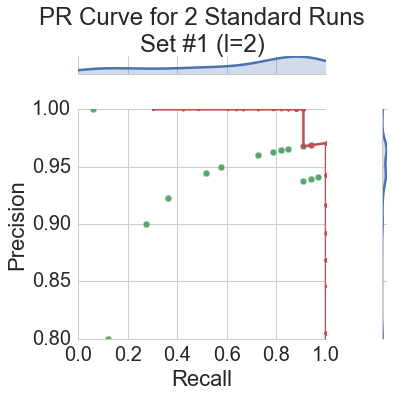

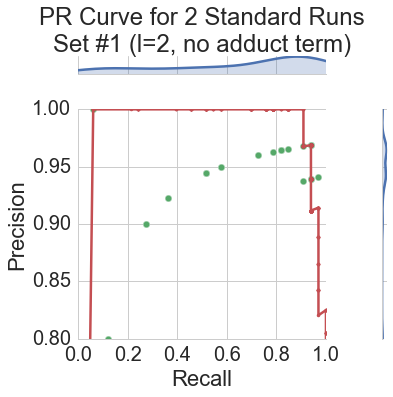

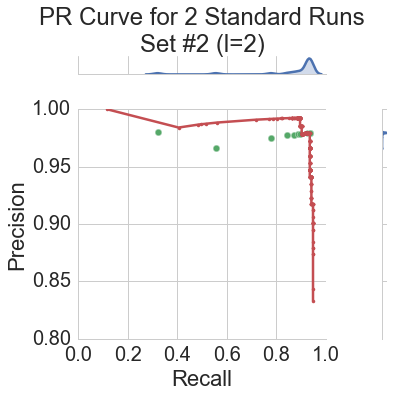

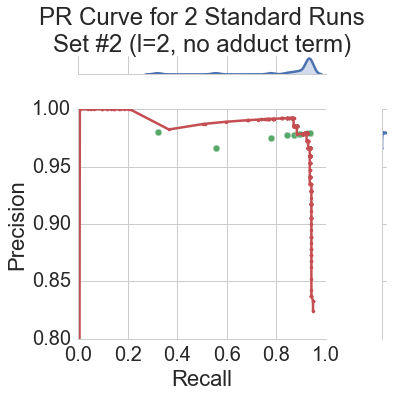

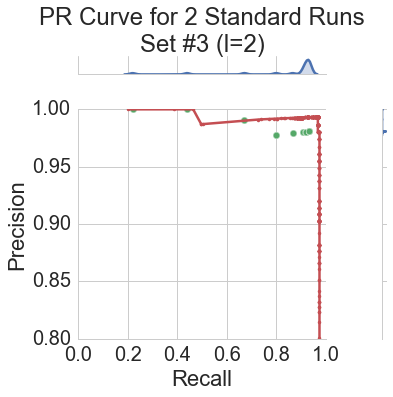

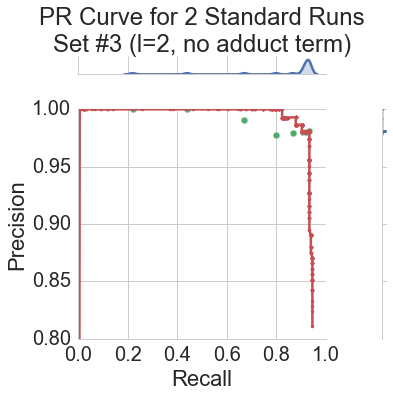

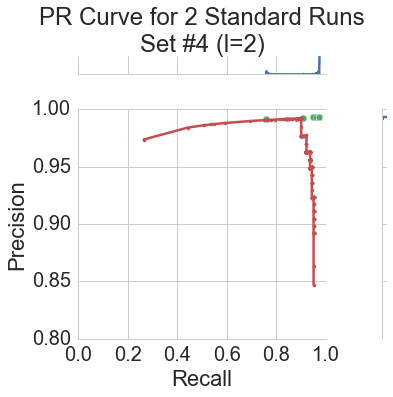

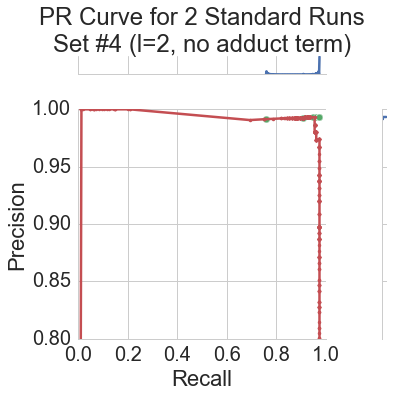

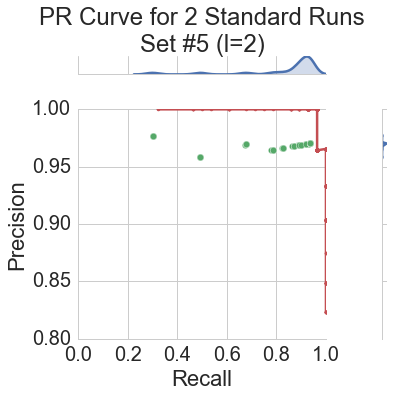

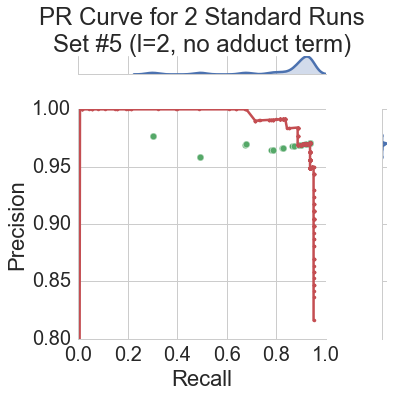

In [36]:
for n in range(n_set):
    df = set2_q2[n]
    no_adduct_df = set2_no_adduct_q2[n]
    plot_scatter(exp_results_2b_q2, n, df, 'PR Curve for 2 Standard Runs\nSet #%d (l=%d)' % (n+1, 2), 
                 saveto='figures/pr_run%d_set%d_q%d.pdf' % (2, n, 2))
    plot_scatter(exp_results_2b_q2, n, no_adduct_df, 'PR Curve for 2 Standard Runs\nSet #%d (l=%d, no adduct term)' % (n+1, 2), 
                saveto='figures/pr_run%d_set%d_q%d_no_adduct.pdf' % (2, n, 2))

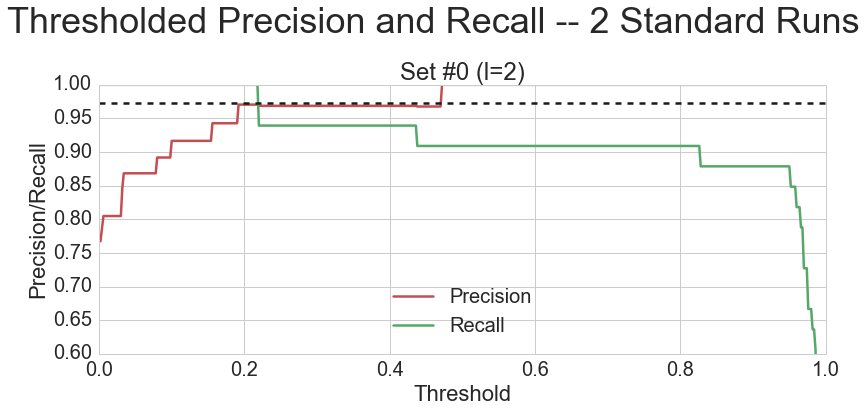

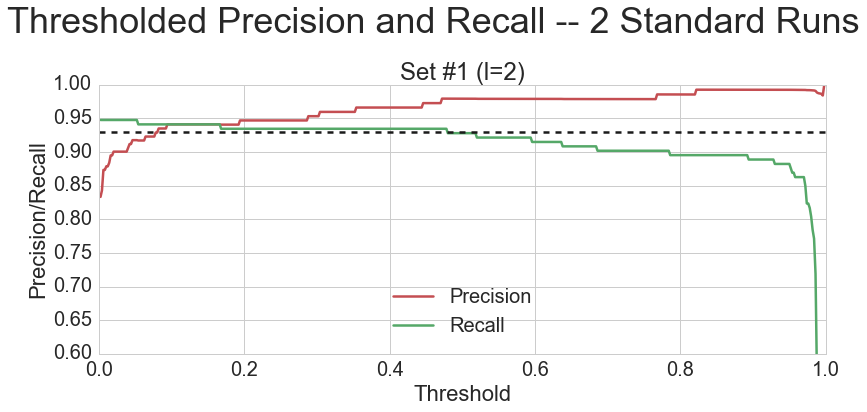

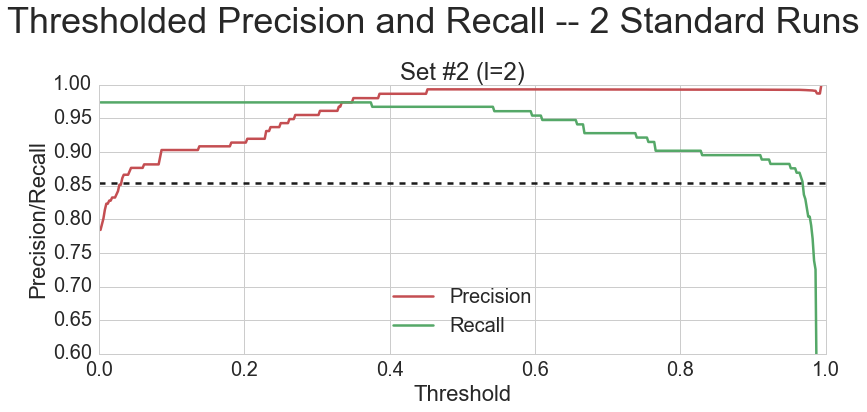

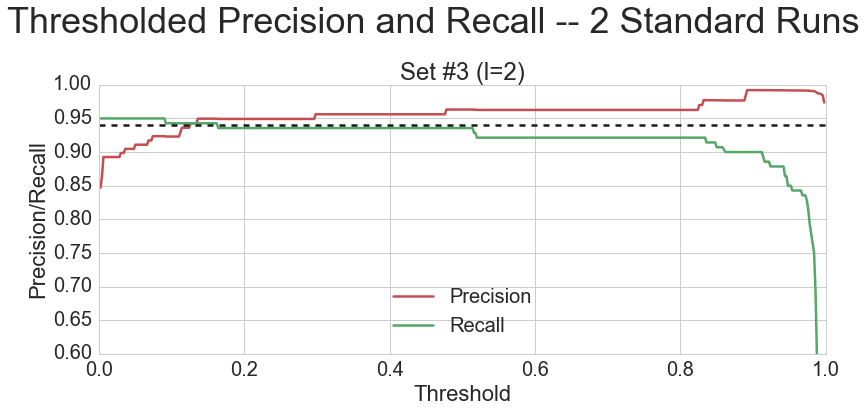

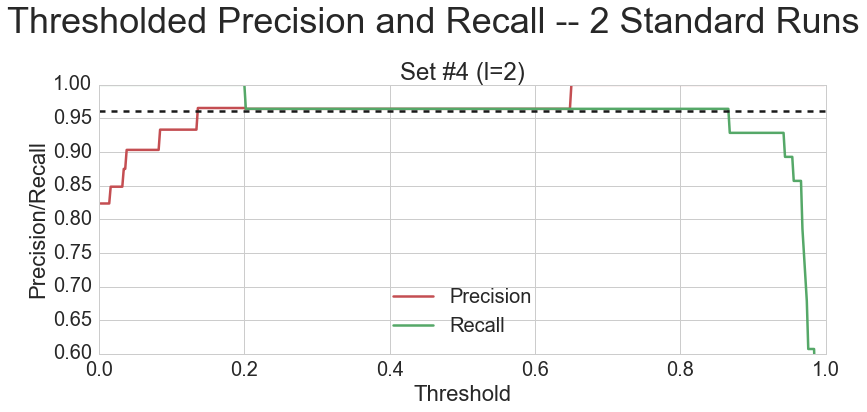

In [37]:
for n in range(n_set):    
    
    df_q2 = set2_q2[n]
    best_q2 = get_best_f1_set2(n, 2)
    best_prec_q2 = best_q2['Prec']

    fig = plt.figure(figsize=(12, 6))
    
    ax = fig.add_subplot(1, 1, 1)
    plt.plot(df_q2['Threshold'], df_q2['Prec'], 'r-', label='Precision')
    plt.plot(df_q2['Threshold'], df_q2['Rec'], 'g-', label='Recall')
    plt.plot((0, 1), (best_prec_q2, best_prec_q2), 'k--')
    legend = ax.legend(loc='lower center', shadow=True)
    plt.ylim([0.6, 1.0])
    plt.xlabel('Threshold')
    plt.ylabel('Precision/Recall')
    # plt.locator_params(axis='x',nbins=10)
    plt.title('Set #%d (l=%d)' % (n, 2))
    
    plt.suptitle('Thresholded Precision and Recall -- 2 Standard Runs', fontsize=36)
    plt.tight_layout()
    plt.subplots_adjust(top=0.80)        
    saveto='figures/threshpr_run%d_set%d.pdf' % (2, n+1)
    plt.savefig(saveto)

<h2>Plots for sets of three Standards</h2>

In [38]:
cm_q2 = []
cm_q3 = []

cc_q2 = []
cc_q3 = []

cc_na_q2 = []
cc_na_q3 = []

for n in range(n_set):

    df_q2 = set3_q2[n]
    df_q3 = set3_q3[n]

    df_no_adduct_q2 = set3_no_adduct_q2[n]
    df_no_adduct_q3 = set3_no_adduct_q3[n]
    
    best_q2 = get_best_f1_set3(n, 2)
    best_q3 = get_best_f1_set3(n, 3)
    
    print "================================================="
    print "SET %d" % n
    print "================================================="

    print "Cluster-Match q=2"
    res = (best_q2['Prec'], best_q2['Rec'], best_q2['F1'])
    cm_q2.append(res)
    print "\tprec=%.2f\trec=%.2f\tf1=%.2f" % res
    print
    
    print "Cluster-Cluster q=2"
    res = get_thresholded_performances(df_q2)
    cc_q2.append(res)    
    print

    print "Cluster-Cluster (no adduct) q=2"
    res = get_thresholded_performances(df_no_adduct_q2)
    cc_na_q2.append(res)    
    print    
    
    print "Cluster-Match q=3"
    res = (best_q3['Prec'], best_q3['Rec'], best_q3['F1'])
    cm_q3.append(res)
    print "\tprec=%.2f\trec=%.2f\tf1=%.2f" % res
    print
    
    print "Cluster-Cluster q=3"
    res = get_thresholded_performances(df_q3)
    cc_q3.append(res)
    print
    
    print "Cluster-Cluster (no adduct) q=3"
    res = get_thresholded_performances(df_no_adduct_q3)
    cc_na_q3.append(res)
    print
    
print "**********************************************************"
print " AVERAGES "
print "**********************************************************"
print

print "Cluster-Match q=2"
avg_cm(cm_q2)
print

print "Cluster-Cluster q=2"
avg_cc(cc_q2)
print

print "Cluster-Cluster (no adduct term) q=2"
avg_cc(cc_na_q2)
print

print "Cluster-Match q=3"
avg_cm(cm_q3)
print

print "Cluster-Cluster q=3"
avg_cc(cc_q3)
print

print "Cluster-Cluster (no adduct term) q=3"
avg_cc(cc_na_q3)
print

SET 0
Cluster-Match q=2
	prec=0.97	rec=0.94	f1=0.96

Cluster-Cluster q=2
t=0.30	prec=0.97	rec=0.94	f1=0.96
t=0.60	prec=0.97	rec=0.94	f1=0.95
t=0.90	prec=0.98	rec=0.85	f1=0.91

Cluster-Cluster (no adduct) q=2
t=0.30	prec=0.97	rec=0.94	f1=0.95
t=0.60	prec=0.97	rec=0.92	f1=0.94
t=0.90	prec=0.98	rec=0.74	f1=0.85

Cluster-Match q=3
	prec=0.98	rec=0.93	f1=0.95

Cluster-Cluster q=3
t=0.30	prec=0.98	rec=0.93	f1=0.95
t=0.60	prec=0.98	rec=0.93	f1=0.95
t=0.90	prec=0.98	rec=0.84	f1=0.91

Cluster-Cluster (no adduct) q=3
t=0.30	prec=0.98	rec=0.93	f1=0.95
t=0.60	prec=0.97	rec=0.91	f1=0.94
t=0.90	prec=0.98	rec=0.74	f1=0.84

SET 1
Cluster-Match q=2
	prec=0.93	rec=0.90	f1=0.92

Cluster-Cluster q=2
t=0.30	prec=0.94	rec=0.89	f1=0.92
t=0.60	prec=0.94	rec=0.89	f1=0.92
t=0.90	prec=0.95	rec=0.86	f1=0.91

Cluster-Cluster (no adduct) q=2
t=0.30	prec=0.94	rec=0.89	f1=0.91
t=0.60	prec=0.95	rec=0.89	f1=0.92
t=0.90	prec=0.96	rec=0.75	f1=0.84

Cluster-Match q=3
	prec=0.90	rec=0.86	f1=0.88

Cluster-Cluster q=3
t=0.30

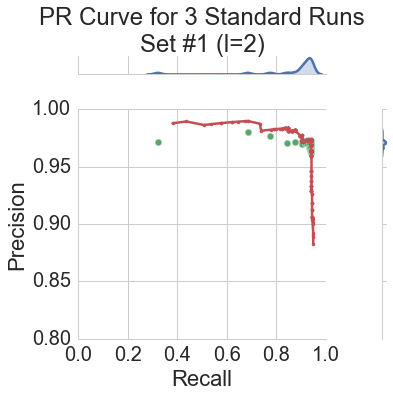

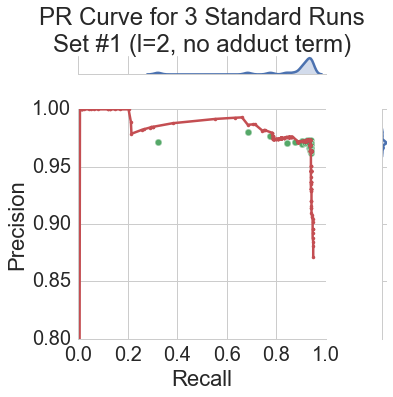

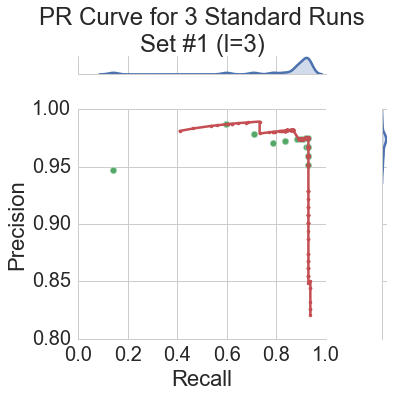

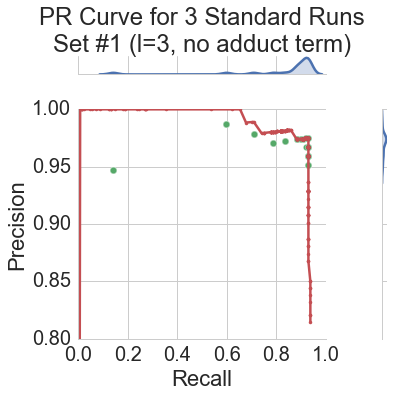

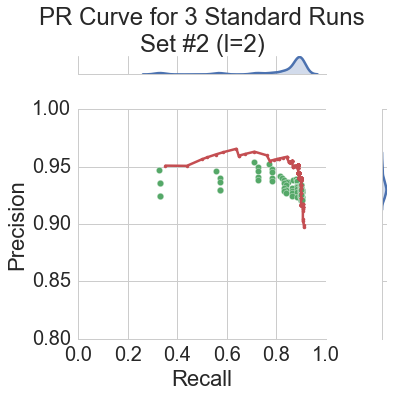

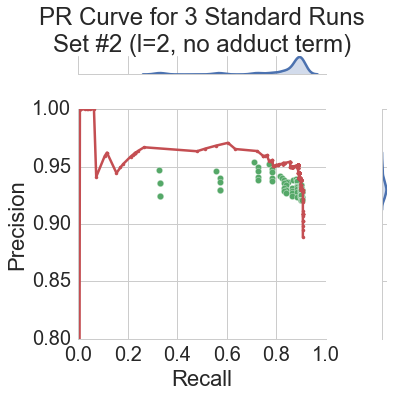

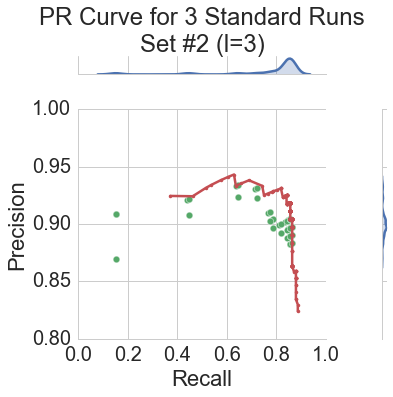

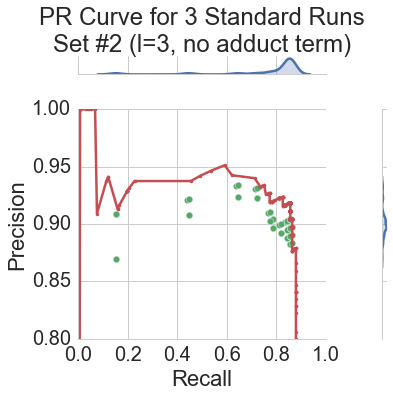

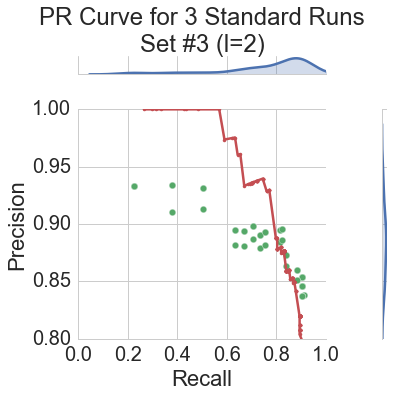

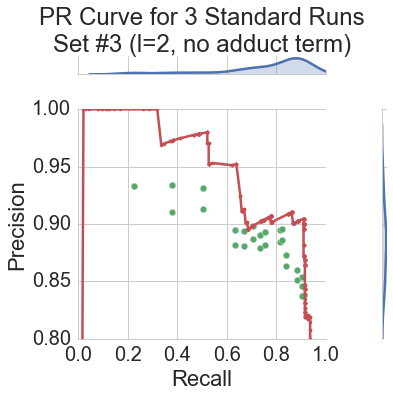

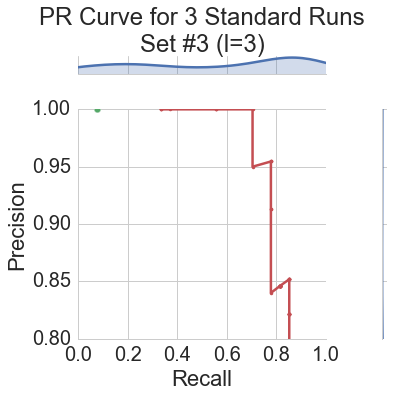

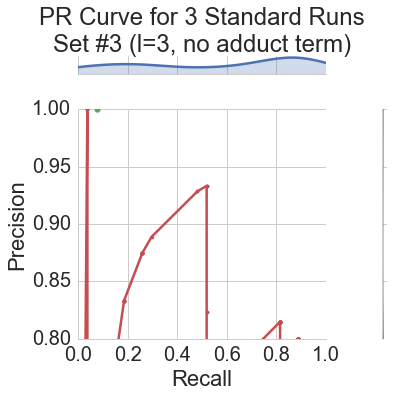

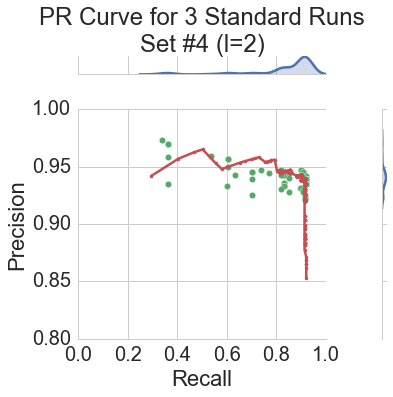

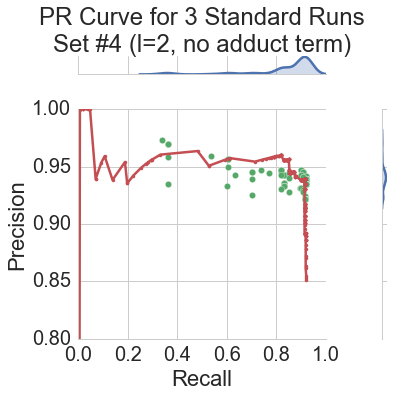

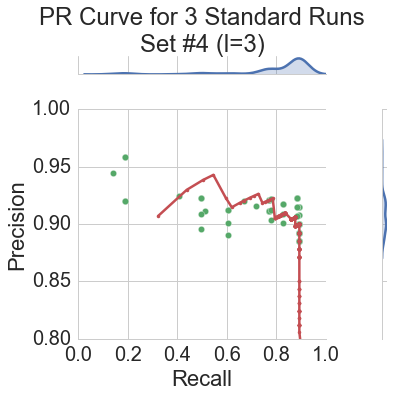

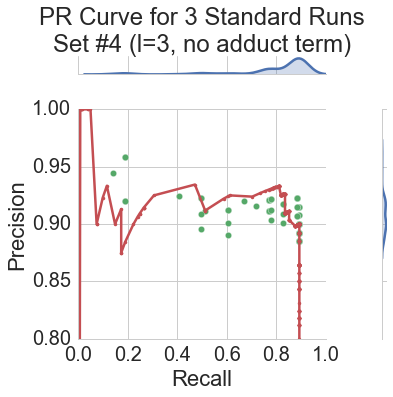

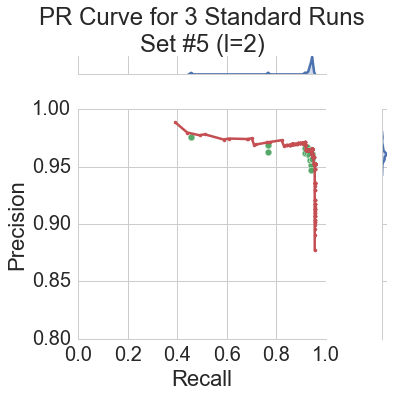

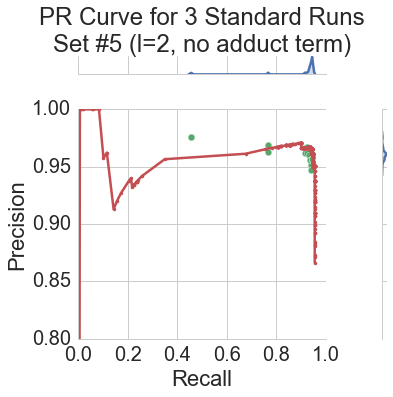

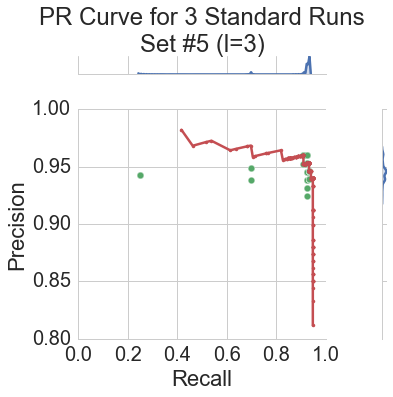

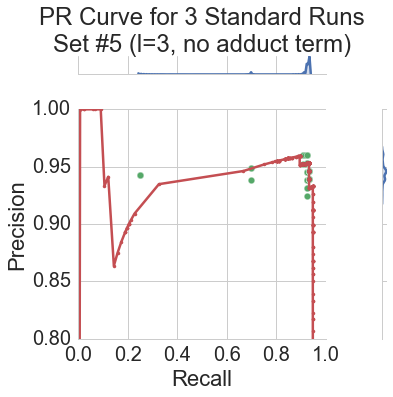

In [39]:
for n in range(n_set):
    df_q2 = set3_q2[n]
    df_q3 = set3_q3[n]
    no_adduct_df_q2 = set3_no_adduct_q2[n]
    no_adduct_df_q3 = set3_no_adduct_q3[n]    

    plot_scatter(exp_results_3b_q2, n, df_q2, 'PR Curve for 3 Standard Runs\nSet #%d (l=%d)' % (n+1, 2),
                 saveto='figures/pr_run%d_set%d_q%d.pdf' % (3, n, 2), set_ylim=True)
    
    plot_scatter(exp_results_3b_q2, n, no_adduct_df_q2, 'PR Curve for 3 Standard Runs\nSet #%d (l=%d, no adduct term)' % (n+1, 2),
                 saveto='figures/pr_run%d_set%d_q%d_no_adduct.pdf' % (3, n, 2), set_ylim=True)                 
    
    plot_scatter(exp_results_3b_q3, n, df_q3, 'PR Curve for 3 Standard Runs\nSet #%d (l=%d)' % (n+1, 3),
                 saveto='figures/pr_run%d_set%d_q%d.pdf' % (3, n, 3), set_ylim=True)                 
    
    plot_scatter(exp_results_3b_q3, n, no_adduct_df_q3, 'PR Curve for 3 Standard Runs\nSet #%d (l=%d, no adduct term)' % (n+1, 3),
                 saveto='figures/pr_run%d_set%d_q%d_no_adduct.pdf' % (3, n, 3), set_ylim=True)

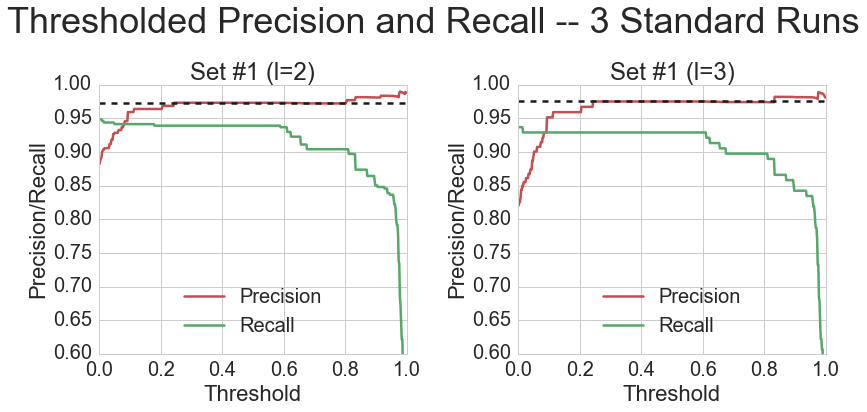

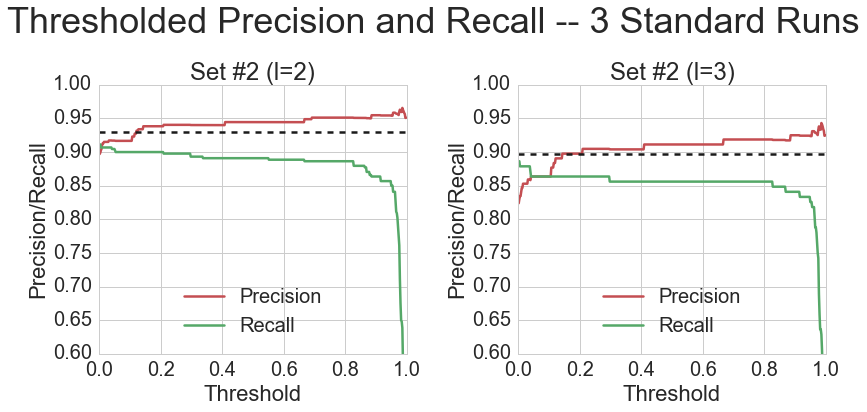

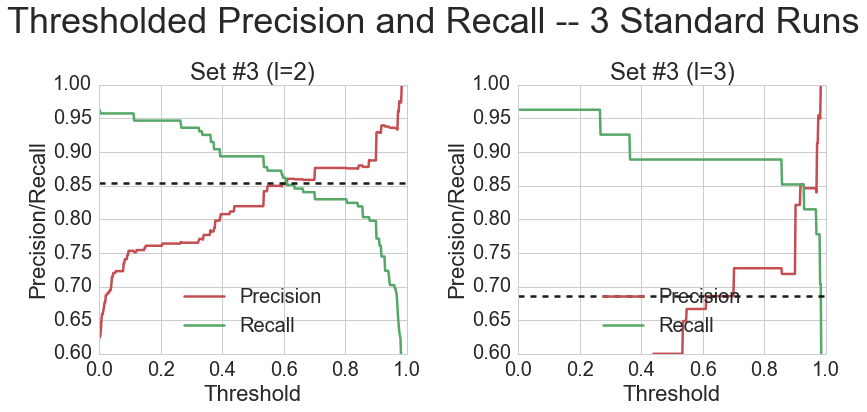

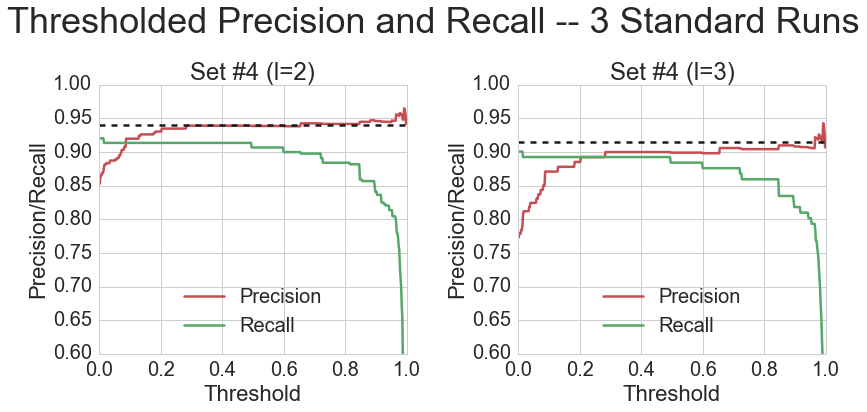

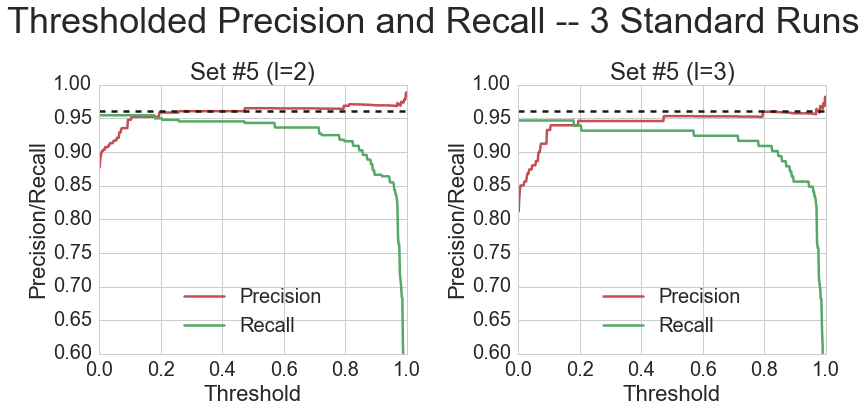

In [40]:
for n in range(n_set):    
    
    df_q2 = set3_q2[n]
    df_q3 = set3_q3[n]
    best_q2 = get_best_f1_set3(n, 2)
    best_q3 = get_best_f1_set3(n, 3)
    best_prec_q2 = best_q2['Prec']
    best_prec_q3 = best_q3['Prec']

    fig = plt.figure(figsize=(12, 6))
    
    ax = fig.add_subplot(1, 2, 1)
    plt.plot(df_q2['Threshold'], df_q2['Prec'], 'r-', label='Precision')
    plt.plot(df_q2['Threshold'], df_q2['Rec'], 'g-', label='Recall')
    plt.plot((0, 1), (best_prec_q2, best_prec_q2), 'k--')
    legend = ax.legend(loc='lower center', shadow=True)
    plt.ylim([0.6, 1.0])
    plt.xlabel('Threshold')
    plt.ylabel('Precision/Recall')
    # plt.locator_params(axis='x',nbins=10)
    plt.title('Set #%d (l=%d)' % (n+1, 2))
    
    ax = fig.add_subplot(1, 2, 2)
    plt.plot(df_q3['Threshold'], df_q3['Prec'], 'r-', label='Precision')
    plt.plot(df_q3['Threshold'], df_q3['Rec'], 'g-', label='Recall')
    plt.plot((0, 1), (best_prec_q3, best_prec_q3), 'k--')
    legend = ax.legend(loc='lower center', shadow=True)
    plt.ylim([0.6, 1.0])
    plt.xlabel('Threshold')
    plt.ylabel('Precision/Recall')
    # plt.locator_params(axis='x',nbins=10)
    plt.title('Set #%d (l=%d)' % (n+1, 3))
    
    plt.suptitle('Thresholded Precision and Recall -- 3 Standard Runs', fontsize=36)
    plt.tight_layout()
    plt.subplots_adjust(top=0.80)        
    
    saveto='figures/threshpr_run%d_set%d.pdf' % (3, n)
    plt.savefig(saveto)

<h2>Plots for sets of four Standards</h2>

In [41]:
cm_q2 = []
cm_q3 = []
cm_q4 = []

cc_q2 = []
cc_q3 = []
cc_q4 = []

cc_na_q2 = []
cc_na_q3 = []
cc_na_q4 = []

for n in range(n_set):

    df_q2 = set4_q2[n]
    df_q3 = set4_q3[n]
    df_q4 = set4_q4[n]

    df_no_adduct_q2 = set4_no_adduct_q2[n]
    df_no_adduct_q3 = set4_no_adduct_q3[n]
    df_no_adduct_q4 = set4_no_adduct_q4[n]
    
    best_q2 = get_best_f1_set4(n, 2)
    best_q3 = get_best_f1_set4(n, 3)
    best_q4 = get_best_f1_set4(n, 4)    
    
    print "================================================="
    print "SET %d" % n
    print "================================================="

    print "Cluster-Match q=2"
    res = (best_q2['Prec'], best_q2['Rec'], best_q2['F1'])
    cm_q2.append(res)
    print "\tprec=%.2f\trec=%.2f\tf1=%.2f" % res
    print
    
    print "Cluster-Cluster q=2"
    res = get_thresholded_performances(df_q2)
    cc_q2.append(res)
    print

    print "Cluster-Cluster (no adduct) q=2"
    cc_na_q2.append(res)
    res = get_thresholded_performances(df_no_adduct_q2)
    print
    
    print "Cluster-Match q=3"
    res = (best_q3['Prec'], best_q3['Rec'], best_q3['F1'])
    cm_q3.append(res)
    print "\tprec=%.2f\trec=%.2f\tf1=%.2f" % res
    print
    
    print "Cluster-Cluster q=3"
    res = get_thresholded_performances(df_q3)
    cc_q3.append(res)    
    print

    print "Cluster-Cluster (no adduct) q=3"
    res = get_thresholded_performances(df_no_adduct_q3)
    cc_na_q3.append(res)
    print
    
    print "Cluster-Match q=4"
    res = (best_q4['Prec'], best_q4['Rec'], best_q4['F1'])
    cm_q4.append(res)
    print "\tprec=%.2f\trec=%.2f\tf1=%.2f" % res
    print
    
    print "Cluster-Cluster q=4"
    res = get_thresholded_performances(df_q4)
    cc_q4.append(res)
    print
    
    print "Cluster-Cluster (no adduct) q=4"
    res = get_thresholded_performances(df_no_adduct_q4)
    cc_na_q4.append(res)    
    print
    
print "**********************************************************"
print " AVERAGES "
print "**********************************************************"
print

print "Cluster-Match q=2"
avg_cm(cm_q2)
print

print "Cluster-Cluster q=2"
avg_cc(cc_q2)
print

print "Cluster-Cluster (no adduct term) q=2"
avg_cc(cc_na_q2)
print

print "Cluster-Match q=3"
avg_cm(cm_q3)
print

print "Cluster-Cluster q=3"
avg_cc(cc_q3)
print

print "Cluster-Cluster (no adduct term) q=3"
avg_cc(cc_na_q3)
print

print "Cluster-Match q=4"
avg_cm(cm_q4)
print

print "Cluster-Cluster q=4"
avg_cc(cc_q4)
print

print "Cluster-Cluster (no adduct term) q=4"
avg_cc(cc_na_q4)
print

SET 0
Cluster-Match q=2
	prec=0.93	rec=0.94	f1=0.93

Cluster-Cluster q=2
t=0.30	prec=0.92	rec=0.92	f1=0.92
t=0.60	prec=0.94	rec=0.84	f1=0.88
t=0.90	prec=0.95	rec=0.74	f1=0.83

Cluster-Cluster (no adduct) q=2
t=0.30	prec=0.94	rec=0.86	f1=0.90
t=0.60	prec=0.95	rec=0.74	f1=0.83
t=0.90	prec=0.95	rec=0.59	f1=0.73

Cluster-Match q=3
	prec=0.91	rec=0.92	f1=0.91

Cluster-Cluster q=3
t=0.30	prec=0.90	rec=0.90	f1=0.90
t=0.60	prec=0.91	rec=0.83	f1=0.87
t=0.90	prec=0.93	rec=0.74	f1=0.82

Cluster-Cluster (no adduct) q=3
t=0.30	prec=0.92	rec=0.84	f1=0.88
t=0.60	prec=0.93	rec=0.72	f1=0.81
t=0.90	prec=0.93	rec=0.58	f1=0.71

Cluster-Match q=4
	prec=0.88	rec=0.91	f1=0.90

Cluster-Cluster q=4
t=0.30	prec=0.87	rec=0.90	f1=0.88
t=0.60	prec=0.88	rec=0.83	f1=0.85
t=0.90	prec=0.92	rec=0.74	f1=0.82

Cluster-Cluster (no adduct) q=4
t=0.30	prec=0.91	rec=0.83	f1=0.87
t=0.60	prec=0.92	rec=0.72	f1=0.81
t=0.90	prec=0.92	rec=0.57	f1=0.71

SET 1
Cluster-Match q=2
	prec=0.94	rec=0.94	f1=0.94

Cluster-Cluster q=2
t=0.30

/Users/joewandy/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


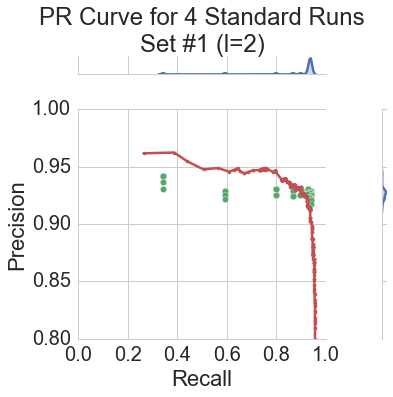

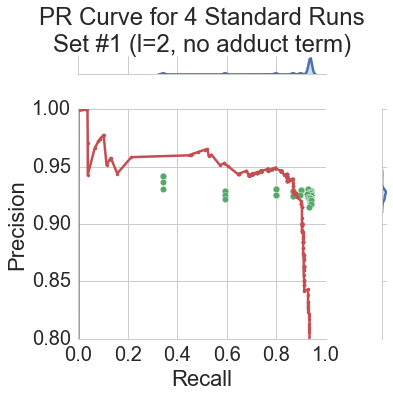

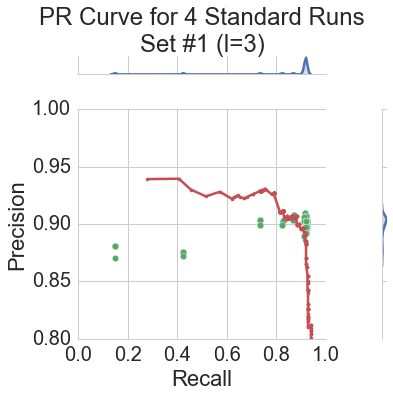

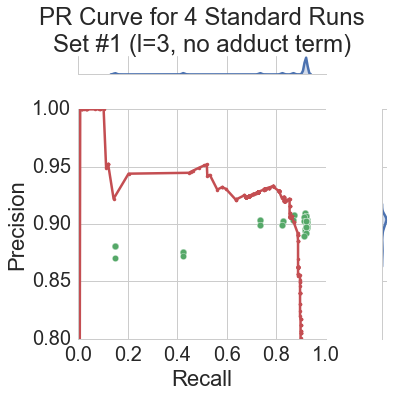

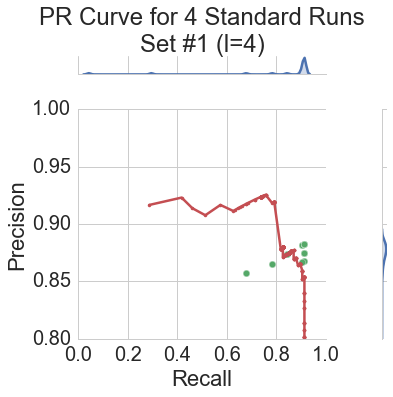

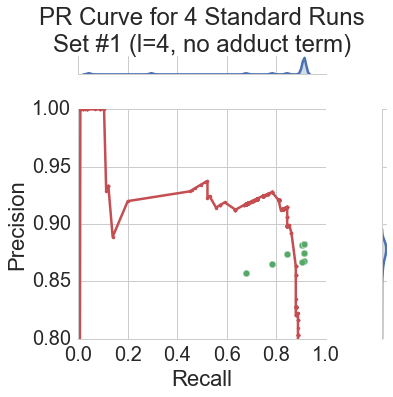

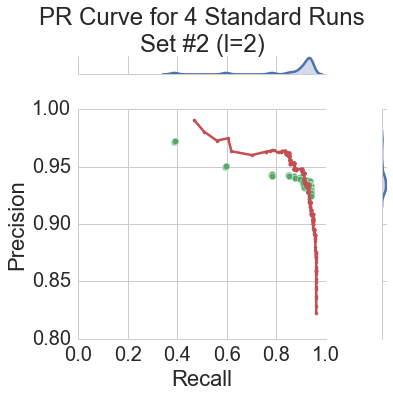

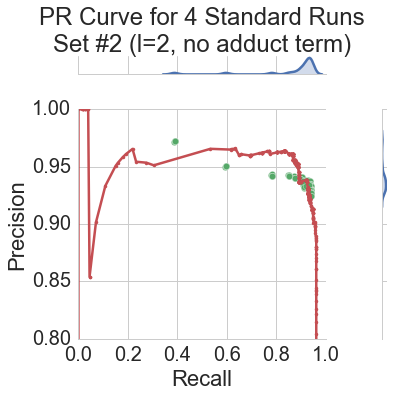

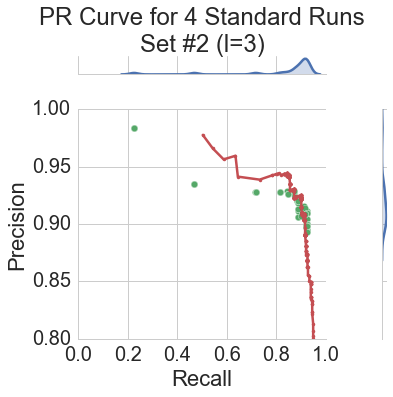

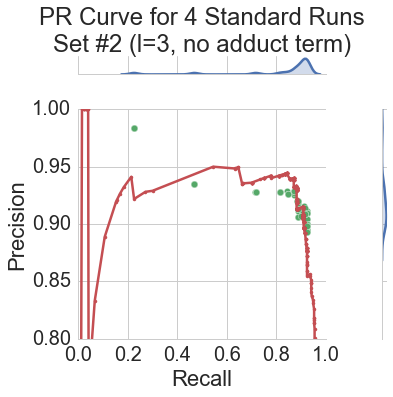

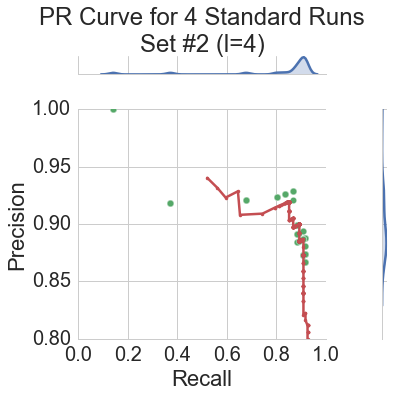

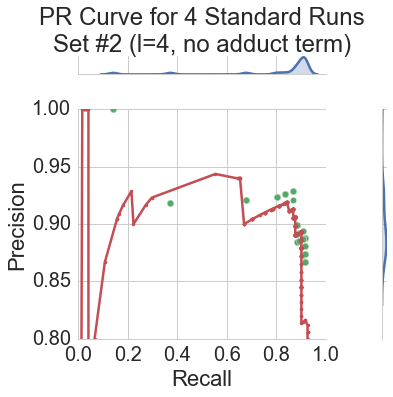

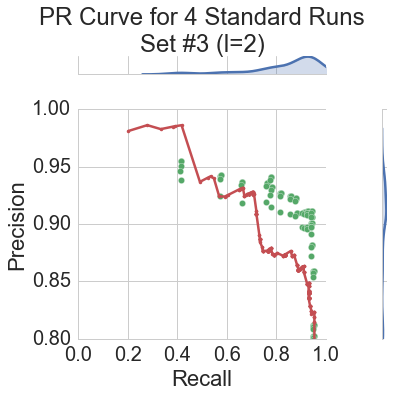

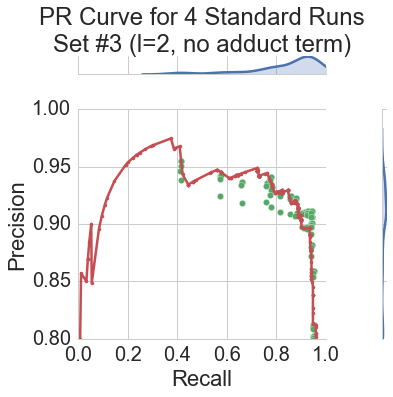

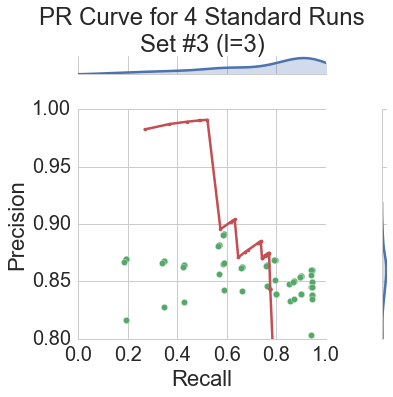

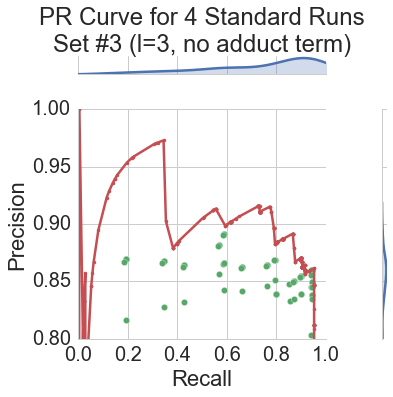

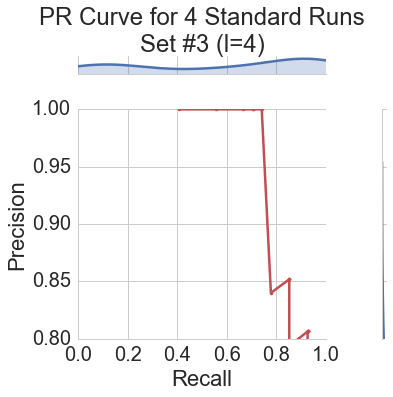

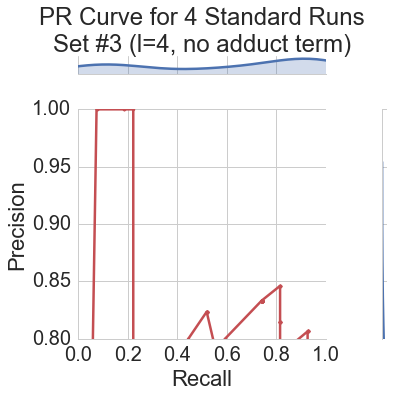

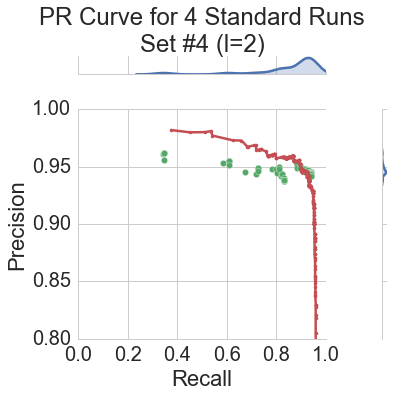

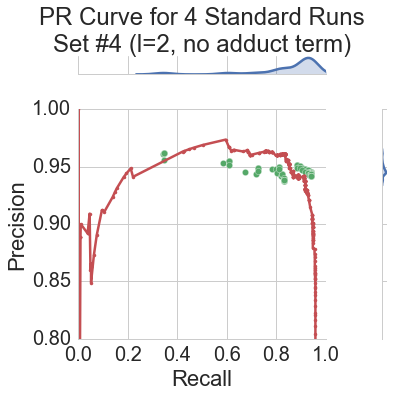

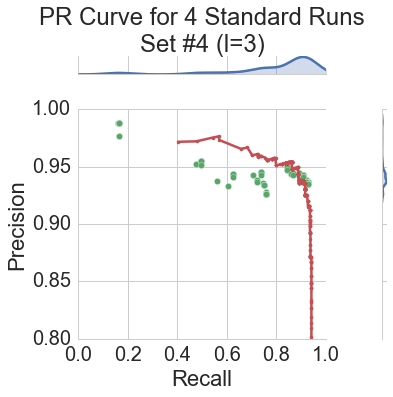

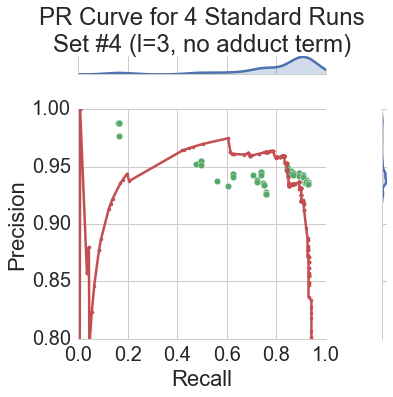

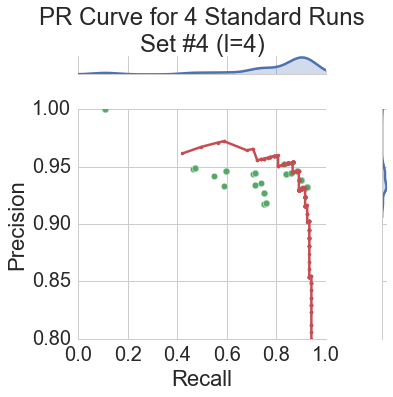

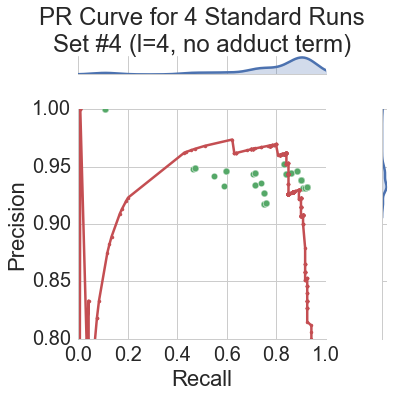

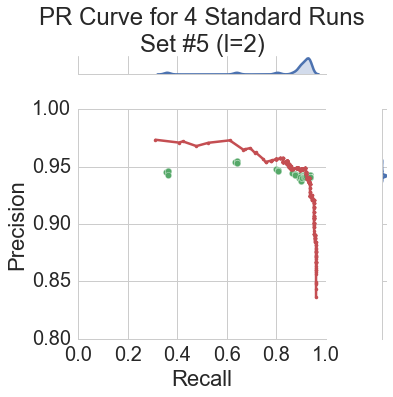

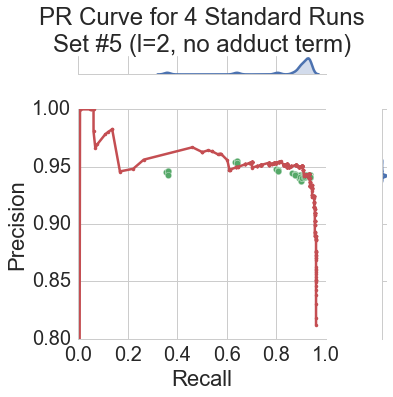

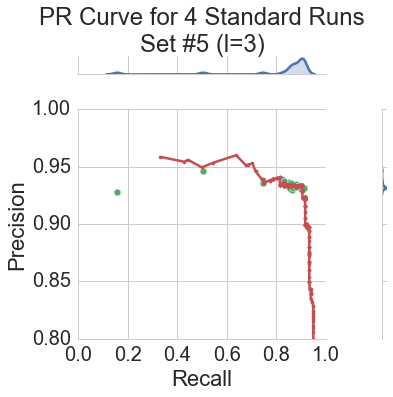

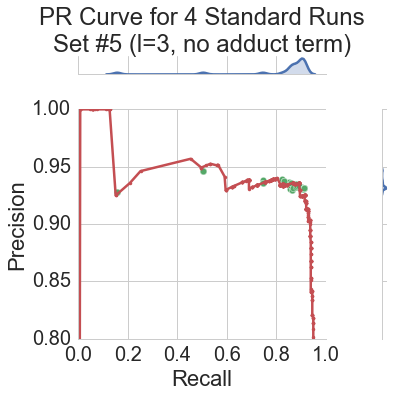

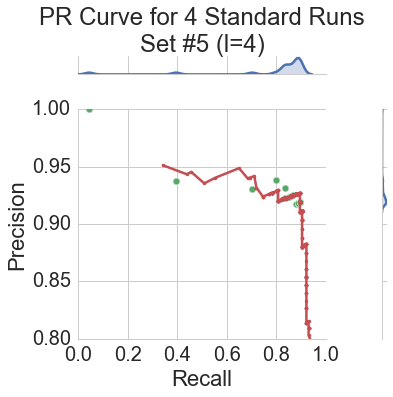

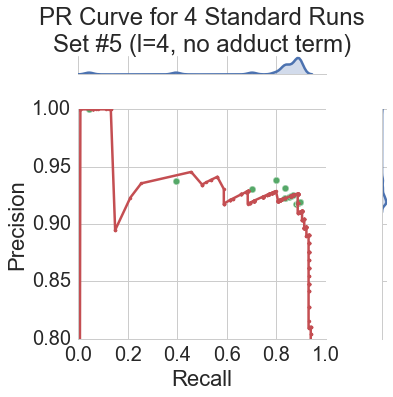

In [42]:
for n in range(n_set):    
    df_q2 = set4_q2[n]
    df_q3 = set4_q3[n]
    df_q4 = set4_q4[n]
    df_no_adduct_q2 = set4_no_adduct_q2[n]
    df_no_adduct_q3 = set4_no_adduct_q3[n]
    df_no_adduct_q4 = set4_no_adduct_q4[n]
    
    plot_scatter(exp_results_4b_q2, n, df_q2, 'PR Curve for 4 Standard Runs\nSet #%d (l=%d)' % (n+1, 2),
                 saveto='figures/pr_run%d_set%d_q%d.pdf' % (4, n, 2), set_ylim=True)

    plot_scatter(exp_results_4b_q2, n, df_no_adduct_q2, 'PR Curve for 4 Standard Runs\nSet #%d (l=%d, no adduct term)' % (n+1, 2),
                 saveto='figures/pr_run%d_set%d_q%d_no_adduct.pdf' % (4, n, 2), set_ylim=True)
    
    plot_scatter(exp_results_4b_q3, n, df_q3, 'PR Curve for 4 Standard Runs\nSet #%d (l=%d)' % (n+1, 3),
                 saveto='figures/pr_run%d_set%d_q%d.pdf' % (4, n, 3), set_ylim=True)
    
    plot_scatter(exp_results_4b_q3, n, df_no_adduct_q3, 'PR Curve for 4 Standard Runs\nSet #%d (l=%d, no adduct term)' % (n+1, 3),
                 saveto='figures/pr_run%d_set%d_q%d_no_adduct.pdf' % (4, n, 3), set_ylim=True)
    
    plot_scatter(exp_results_4b_q4, n, df_q4, 'PR Curve for 4 Standard Runs\nSet #%d (l=%d)' % (n+1, 4),
                 saveto='figures/pr_run%d_set%d_q%d.pdf' % (4, n, 4), set_ylim=True)
    
    plot_scatter(exp_results_4b_q4, n, df_no_adduct_q4, 'PR Curve for 4 Standard Runs\nSet #%d (l=%d, no adduct term)' % (n+1, 4),
                 saveto='figures/pr_run%d_set%d_q%d_no_adduct.pdf' % (4, n, 4), set_ylim=True)

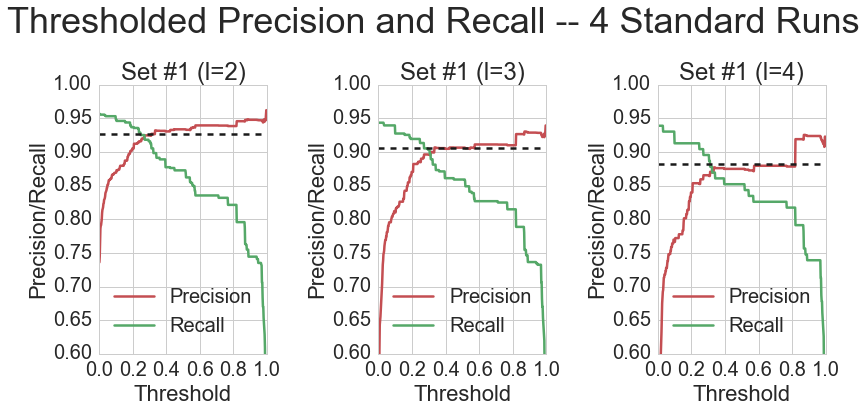

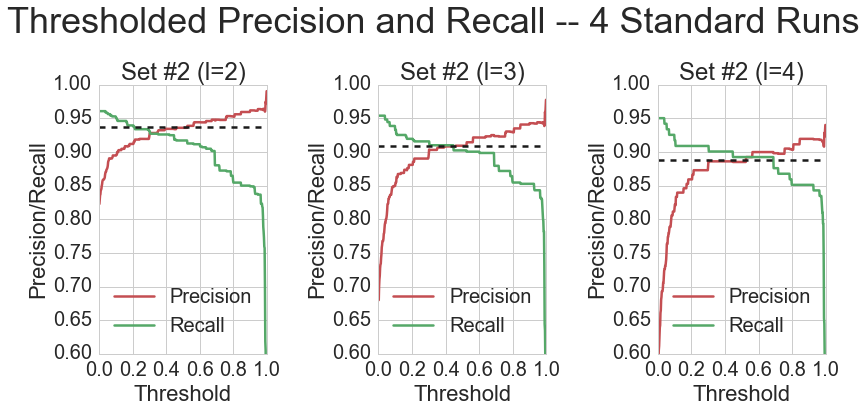

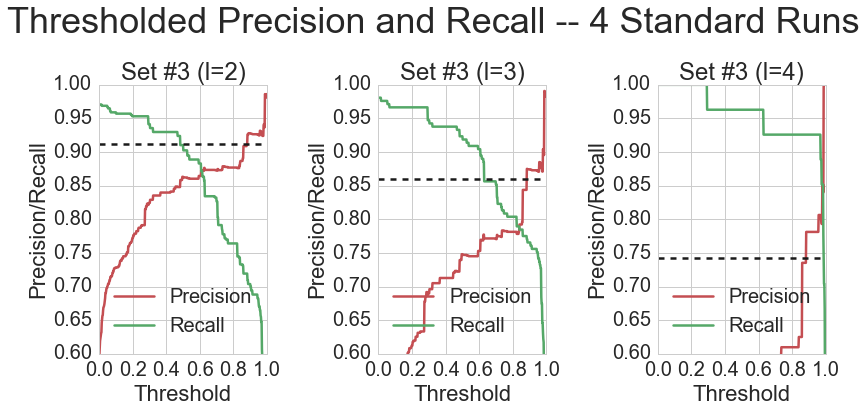

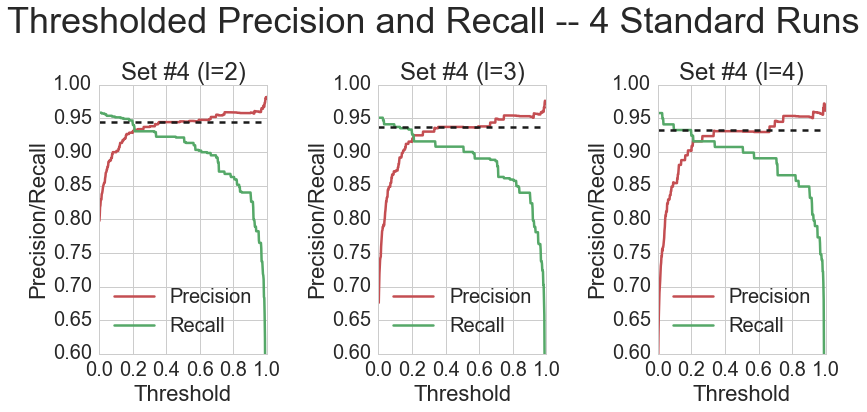

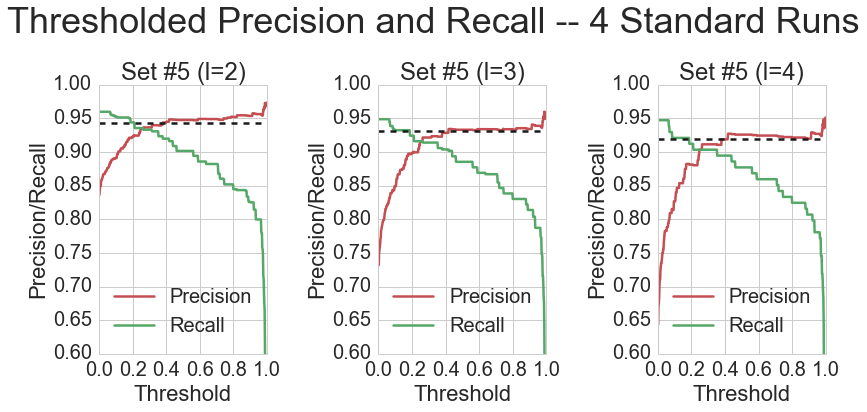

In [43]:
for n in range(n_set):    
    
    df_q2 = set4_q2[n]
    df_q3 = set4_q3[n]
    df_q4 = set4_q4[n]
    best_q2 = get_best_f1_set4(n, 2)
    best_q3 = get_best_f1_set4(n, 3)
    best_q4 = get_best_f1_set4(n, 4)        
    best_prec_q2 = best_q2['Prec']
    best_prec_q3 = best_q3['Prec']
    best_prec_q4 = best_q4['Prec']

    fig = plt.figure(figsize=(12, 6))
    
    ax = fig.add_subplot(1, 3, 1)
    plt.plot(df_q2['Threshold'], df_q2['Prec'], 'r-', label='Precision')
    plt.plot(df_q2['Threshold'], df_q2['Rec'], 'g-', label='Recall')
    plt.plot((0, 1), (best_prec_q2, best_prec_q2), 'k--')
    legend = ax.legend(loc='lower center', shadow=True)
    plt.ylim([0.6, 1.0])
    plt.xlabel('Threshold')
    plt.ylabel('Precision/Recall')
    # plt.locator_params(axis='x',nbins=10)
    plt.title('Set #%d (l=%d)' % (n+1, 2))
    
    ax = fig.add_subplot(1, 3, 2)
    plt.plot(df_q3['Threshold'], df_q3['Prec'], 'r-', label='Precision')
    plt.plot(df_q3['Threshold'], df_q3['Rec'], 'g-', label='Recall')
    plt.plot((0, 1), (best_prec_q3, best_prec_q3), 'k--')
    legend = ax.legend(loc='lower center', shadow=True)
    plt.ylim([0.6, 1.0])
    plt.xlabel('Threshold')
    plt.ylabel('Precision/Recall')
    # plt.locator_params(axis='x',nbins=10)
    plt.title('Set #%d (l=%d)' % (n+1, 3))
    
    ax = fig.add_subplot(1, 3, 3)
    plt.plot(df_q4['Threshold'], df_q4['Prec'], 'r-', label='Precision')
    plt.plot(df_q4['Threshold'], df_q4['Rec'], 'g-', label='Recall')
    plt.plot((0, 1), (best_prec_q4, best_prec_q4), 'k--')
    legend = ax.legend(loc='lower center', shadow=True)
    plt.ylim([0.6, 1.0])
    plt.xlabel('Threshold')
    plt.ylabel('Precision/Recall')
    # plt.locator_params(axis='x',nbins=10)
    plt.title('Set #%d (l=%d)' % (n+1, 4))
    
    plt.suptitle('Thresholded Precision and Recall -- 4 Standard Runs', fontsize=36)
    plt.tight_layout()
    plt.subplots_adjust(top=0.80)        
    
    saveto='figures/threshpr_run%d_set%d.pdf' % (4, n)
    plt.savefig(saveto)

<H2>Plots for the Beer</h2>

In [44]:
cm_q2 = []
cm_q3 = []

cc_q2 = []
cc_q3 = []

cc_na_q2 = []
cc_na_q3 = []

n = 0

df_q2 = beer3_q2[n]
df_q3 = beer3_q3[n]

df_no_adduct_q2 = beer3_no_adduct_q2[n]
df_no_adduct_q3 = beer3_no_adduct_q3[n]

best_q2 = get_best_f1_beer3(n, 2)
best_q3 = get_best_f1_beer3(n, 3)

print "================================================="
print "BEER3"
print "================================================="

print "Cluster-Match q=2"
res = (best_q2['Prec'], best_q2['Rec'], best_q2['F1'])
cm_q2.append(res)
print "\tprec=%.2f\trec=%.2f\tf1=%.2f" % res
print

print "Cluster-Cluster q=2"
res = get_thresholded_performances(df_q2)
cc_q2.append(res)    
print

print "Cluster-Cluster (no adduct) q=2"
res = get_thresholded_performances(df_no_adduct_q2)
cc_na_q2.append(res)    
print

print "Cluster-Match q=3"
res = (best_q3['Prec'], best_q3['Rec'], best_q3['F1'])
cm_q3.append(res)
print "\tprec=%.2f\trec=%.2f\tf1=%.2f" % res
print

print "Cluster-Cluster q=3"
res = get_thresholded_performances(df_q3)
cc_q3.append(res)
print

print "Cluster-Cluster (no adduct) q=3"
res = get_thresholded_performances(df_no_adduct_q3)
cc_na_q3.append(res)
print

print "**********************************************************"
print " AVERAGES "
print "**********************************************************"
print

print "Cluster-Match q=2"
avg_cm(cm_q2)
print

print "Cluster-Cluster q=2"
avg_cc(cc_q2)
print

print "Cluster-Cluster (no adduct term) q=2"
avg_cc(cc_na_q2)
print

print "Cluster-Match q=3"
avg_cm(cm_q3)
print

print "Cluster-Cluster q=3"
avg_cc(cc_q3)
print

print "Cluster-Cluster (no adduct term) q=3"
avg_cc(cc_na_q3)
print

BEER3
Cluster-Match q=2
	prec=0.92	rec=0.89	f1=0.91

Cluster-Cluster q=2
t=0.30	prec=0.82	rec=0.83	f1=0.82
t=0.60	prec=0.89	rec=0.71	f1=0.79
t=0.90	prec=0.95	rec=0.57	f1=0.71

Cluster-Cluster (no adduct) q=2
t=0.30	prec=0.86	rec=0.80	f1=0.83
t=0.60	prec=0.92	rec=0.59	f1=0.72
t=0.90	prec=0.94	rec=0.51	f1=0.66

Cluster-Match q=3
	prec=0.92	rec=0.89	f1=0.91

Cluster-Cluster q=3
t=0.30	prec=0.76	rec=0.77	f1=0.77
t=0.60	prec=0.88	rec=0.67	f1=0.76
t=0.90	prec=0.94	rec=0.54	f1=0.68

Cluster-Cluster (no adduct) q=3
t=0.30	prec=0.81	rec=0.76	f1=0.79
t=0.60	prec=0.90	rec=0.55	f1=0.68
t=0.90	prec=0.93	rec=0.48	f1=0.63

**********************************************************
 AVERAGES 
**********************************************************

Cluster-Match q=2
	prec=0.92	rec=0.89	f1=0.91

Cluster-Cluster q=2
t=0.30	prec=0.82	rec=0.83	f1=0.82
t=0.60	prec=0.89	rec=0.71	f1=0.79
t=0.90	prec=0.95	rec=0.57	f1=0.71

Cluster-Cluster (no adduct term) q=2
t=0.30	prec=0.86	rec=0.80	f1=0.83
t=0.60	prec=0

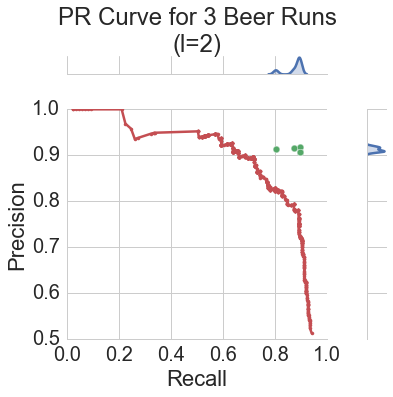

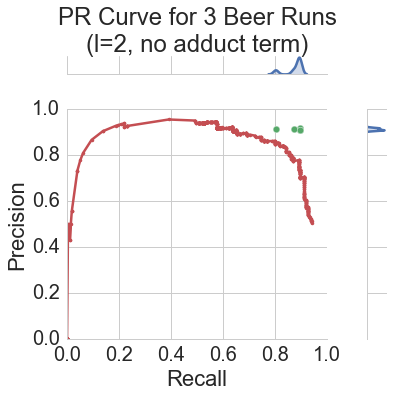

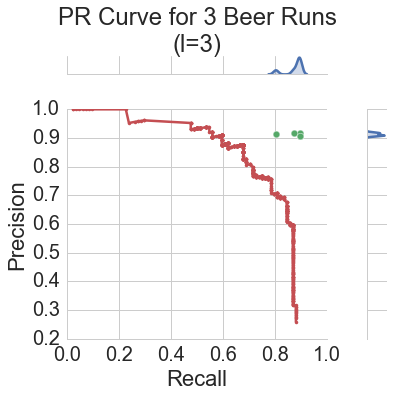

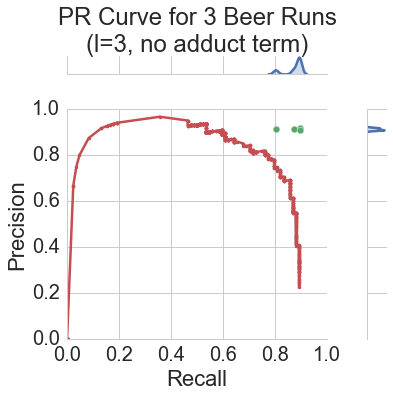

In [48]:
n = 0
df_q2 = beer3_q2[n]
df_q3 = beer3_q3[n]
no_adduct_df_q2 = beer3_no_adduct_q2[n]
no_adduct_df_q3 = beer3_no_adduct_q3[n]    

plot_scatter(exp_results_beer3_q2, n, df_q2,  'PR Curve for 3 Beer Runs\n(l=%d)' % (2),
             saveto='figures/pr_run%d_beer%d_q%d.pdf' % (3, n, 2), set_ylim=True, ylim=[0.5, 1.0])             

plot_scatter(exp_results_beer3_q2, n, no_adduct_df_q2, 'PR Curve for 3 Beer Runs\n(l=%d, no adduct term)' % (2),
             saveto='figures/pr_run%d_beer%d_q%d_no_adduct.pdf' % (3, n, 2), set_ylim=False)                 

plot_scatter(exp_results_beer3_q3, n, df_q3, 'PR Curve for 3 Beer Runs\n(l=%d)' % (3),
             saveto='figures/pr_run%d_beer%d_q%d.pdf' % (3, n, 3), set_ylim=False)             

plot_scatter(exp_results_beer3_q3, n, no_adduct_df_q3, 'PR Curve for 3 Beer Runs\n(l=%d, no adduct term)' % (3),
             saveto='figures/pr_run%d_beer%d_q%d_no_adduct.pdf' % (3, n, 3), set_ylim=False)                 

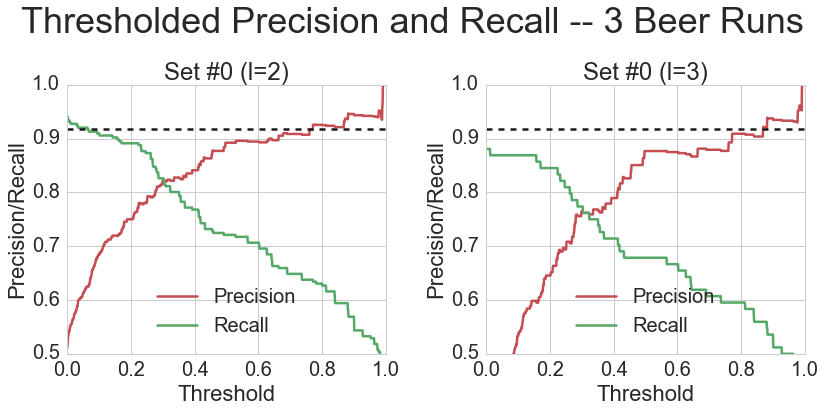

In [46]:
n = 0
df_q2 = beer3_q2[n]
df_q3 = beer3_q3[n]
best_q2 = get_best_f1_beer3(n, 2)
best_q3 = get_best_f1_beer3(n, 3)
best_prec_q2 = best_q2['Prec']
best_prec_q3 = best_q3['Prec']

fig = plt.figure(figsize=(12, 6))

ax = fig.add_subplot(1, 2, 1)
plt.plot(df_q2['Threshold'], df_q2['Prec'], 'r-', label='Precision')
plt.plot(df_q2['Threshold'], df_q2['Rec'], 'g-', label='Recall')
plt.plot((0, 1), (best_prec_q2, best_prec_q2), 'k--')
legend = ax.legend(loc='lower center', shadow=True)
plt.ylim([0.5, 1.0])
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
# plt.locator_params(axis='x',nbins=10)
plt.title('Set #%d (l=%d)' % (n, 2))

ax = fig.add_subplot(1, 2, 2)
plt.plot(df_q3['Threshold'], df_q3['Prec'], 'r-', label='Precision')
plt.plot(df_q3['Threshold'], df_q3['Rec'], 'g-', label='Recall')
plt.plot((0, 1), (best_prec_q3, best_prec_q3), 'k--')
legend = ax.legend(loc='lower center', shadow=True)
plt.ylim([0.5, 1.0])
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
# plt.locator_params(axis='x',nbins=10)
plt.title('Set #%d (l=%d)' % (n, 3))

plt.suptitle('Thresholded Precision and Recall -- 3 Beer Runs', fontsize=36)
plt.tight_layout()
plt.subplots_adjust(top=0.80)        

saveto='figures/threshpr_beer%d_set%d.pdf' % (3, n)
plt.savefig(saveto)